# Árboles de Decisión (DT)

In [30]:
import pandas as pd
# Cargar el dataset

nombres = ['animal','hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
           'toothed', 'backbone', 'breathes','venomous', 'fins', 'legs', 'tail', 'domestic', 'size', 'type']		
dataset = pd.read_csv('C:/Users/christianr/Documents/GitHub/EndomorfismoII_2024_2/02_DT/zoo/zoo.data',names=nombres )

dataset.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,size,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [31]:
# EDA
dataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,size,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [35]:
# Generación del conjunto de entrenamiento y validación
X = dataset.drop(['toothed','animal'], axis=1) # Matriz de entrada  - Eliminar toothed, Nombre_animal(100)
y = dataset['toothed'] # Vector de salida - target (clases)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Escogemos aleatoriamente el 80% para entrenamiento

La exactitud del modelo sin ajustar es: 1.0


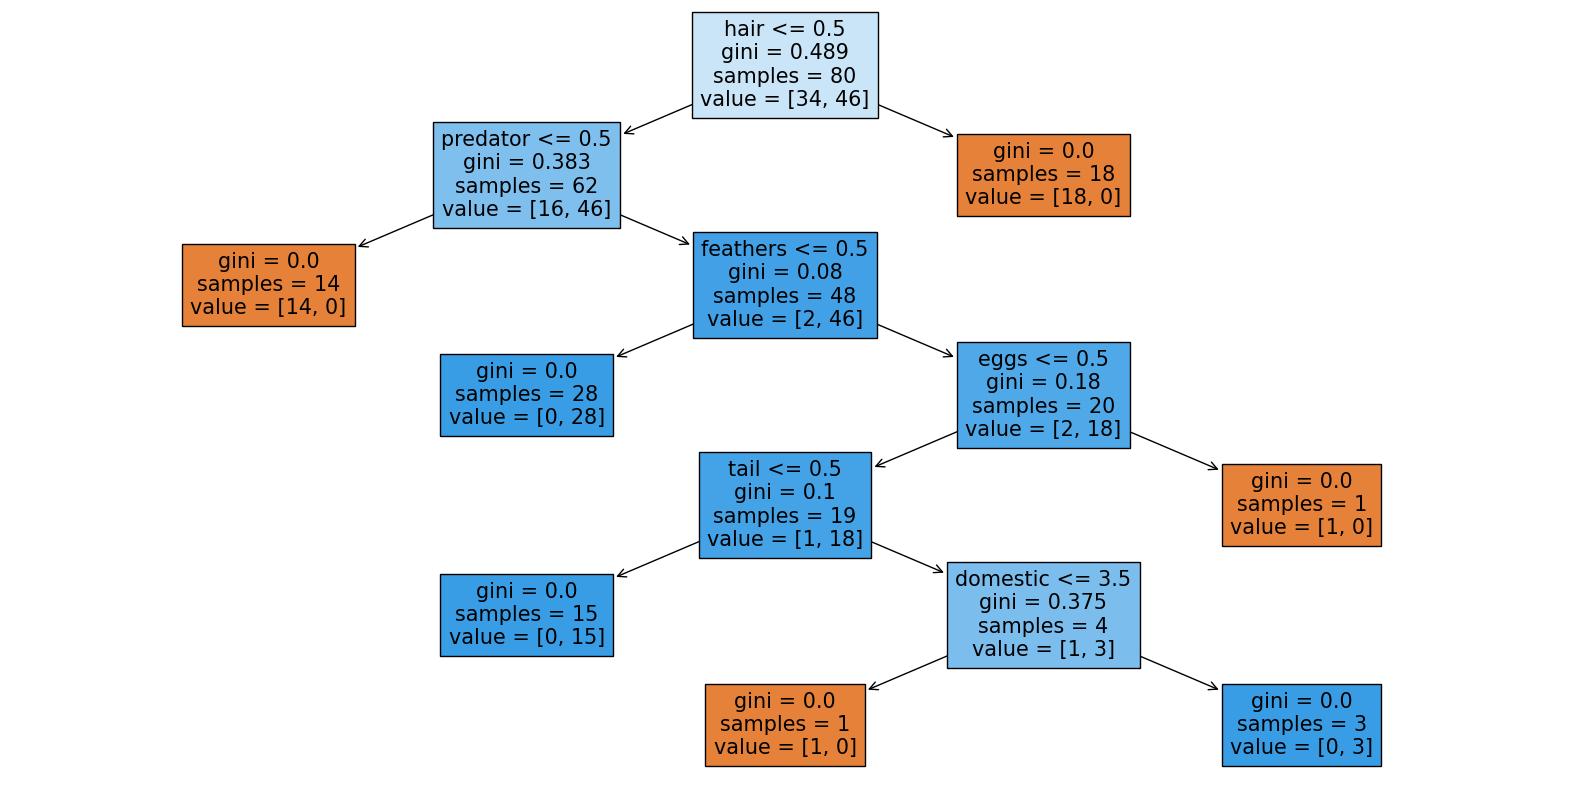

In [37]:
# Generación del modelo - sin poda
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

arbol = DecisionTreeClassifier(random_state = 42)
arbol.fit(X_train, y_train)

# Validación 
y_pred = arbol.predict(X_test)
exactitud = accuracy_score(y_pred, y_test)
print(f'La exactitud del modelo sin ajustar es: {exactitud}')

# Graficar el árbol
plt.figure(figsize=(20,10))
plot_tree(arbol, filled = True, feature_names = nombres)
plt.show()

In [29]:
# Generación del modelo - CON PODA
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

arbol = DecisionTreeClassifier(max_depth=4, random_state = 42)
arbol.fit(X_train, y_train)

# Validación 
y_pred = arbol.predict(X_test)
exactitud = accuracy_score(y_pred, y_test)
print(f'La exactitud del modelo sin ajustar es: {exactitud}')

# Graficar el árbol
plt.figure(figsize=(20,10))
target_nombres = dataset['toothed'].unique()
plot_tree(arbol, filled = True, feature_names = nombres, class_names=target_nombres)
plt.show()

ValueError: could not convert string to float: 'toad'